In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torch.utils.data import sampler
from skimage import transform
import pandas as pd
import torchvision.datasets as dset
import torchvision.transforms as T
import pydicom
import os
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tnrange, tqdm_notebook, tqdm

In [2]:
from Lung_dataset import ILDDataset

NUM_TOTAL = 1968
NUM_TRAIN = 1600

lung_dataset = ILDDataset(csv_file='/Users/magdy/Desktop/Stanford Spring/BMI260/Project/Data/Clean_train_test_dataset/Dataset/train_labels.csv',
                          root_dir='/Users/magdy/Desktop/Stanford Spring/BMI260/Project/Data/Clean_train_test_dataset/Dataset/train',
                          mask=True, HU=True, resize=512)

loader_train = DataLoader(lung_dataset, batch_size= 32,
                          sampler=sampler.SubsetRandomSampler(range(NUM_TRAIN)))

(512, 512)


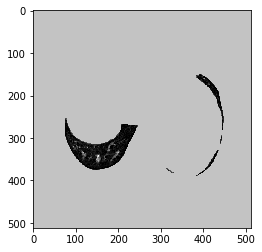

In [4]:
# print(lung_dataset.__len__())
sample = lung_dataset[55]
print(sample[0].shape)
plt.imshow(sample[0][1], cmap='gray')
plt.show()
# plt.imshow(sample[0][1], cmap='gray')
# plt.show()
# plt.imshow(sample[0][2], cmap='gray')
# plt.show()
# plt.imshow(sample[0][3], cmap='gray')
# plt.show()

In [ ]:
#Get number of slices
cyst_dir = '/Users/magdy/Desktop/Stanford Spring/BMI260/Project/Data/cystic_dataset_masks/Test'

list_of_scans = os.listdir(cyst_dir)
print(list_of_scans)
num_scans = len(list_of_scans)

cntr = 0
for scan_num in range(num_scans):
    scan_path = os.path.join(cyst_dir, list_of_scans[scan_num])
#     print(scan_path)
    if (not os.path.isdir(scan_path)) or (list_of_scans[scan_num] == "HRCT_pilot"):
        continue
    list_of_slices = os.listdir(scan_path)
#     print(list_of_slices)
    num_slices = len(list_of_slices)
    for slice_num in range(num_slices):
        if (list_of_slices[slice_num][-4:] != ".png"):
            continue
        slice_path = os.path.join(scan_path,list_of_slices[slice_num])
#         print(slice_path)
        cntr += 1
        
print(cntr)

In [24]:
running_sum = np.zeros(NUM_TRAIN)
for t, (x, y) in enumerate(tqdm(loader_train)):
    running_sum[t] = +  np.sum(x.numpy())/(512*512)
    pass



  0%|          | 0/1600 [00:00<?, ?it/s]

  0%|          | 3/1600 [00:00<00:57, 27.76it/s]

  0%|          | 7/1600 [00:00<00:51, 30.75it/s]

  1%|          | 10/1600 [00:00<00:53, 29.51it/s]

  1%|          | 13/1600 [00:00<00:54, 29.28it/s]

  1%|          | 17/1600 [00:00<00:52, 29.87it/s]

  1%|▏         | 20/1600 [00:00<00:53, 29.29it/s]

  1%|▏         | 23/1600 [00:00<00:53, 29.37it/s]

  2%|▏         | 26/1600 [00:00<00:53, 29.22it/s]

  2%|▏         | 30/1600 [00:01<00:52, 29.79it/s]

  2%|▏         | 33/1600 [00:01<00:53, 29.31it/s]

  2%|▏         | 36/1600 [00:01<00:53, 29.14it/s]

  2%|▏         | 39/1600 [00:01<00:53, 29.18it/s]

  3%|▎         | 42/1600 [00:01<00:53, 29.08it/s]

  3%|▎         | 45/1600 [00:01<00:54, 28.52it/s]

  3%|▎         | 49/1600 [00:01<00:53, 28.80it/s]

  3%|▎         | 53/1600 [00:01<00:53, 29.18it/s]

  4%|▎         | 57/1600 [00:01<00:53, 29.10it/s]

  4%|▍         | 61/1600 [00:02<00:52, 29.35it/s]

  4%|▍         | 65/1600 [00:02<00:53, 2

 31%|███       | 493/1600 [00:17<00:38, 28.54it/s]

 31%|███       | 496/1600 [00:17<00:38, 28.55it/s]

 31%|███       | 499/1600 [00:17<00:38, 28.55it/s]

 31%|███▏      | 502/1600 [00:17<00:38, 28.53it/s]

 32%|███▏      | 505/1600 [00:17<00:38, 28.47it/s]

 32%|███▏      | 508/1600 [00:17<00:38, 28.47it/s]

 32%|███▏      | 511/1600 [00:17<00:38, 28.47it/s]

 32%|███▏      | 514/1600 [00:18<00:38, 28.47it/s]

 32%|███▏      | 517/1600 [00:18<00:38, 28.47it/s]

 32%|███▎      | 520/1600 [00:18<00:37, 28.45it/s]

 33%|███▎      | 523/1600 [00:18<00:37, 28.43it/s]

 33%|███▎      | 526/1600 [00:18<00:37, 28.41it/s]

 33%|███▎      | 529/1600 [00:18<00:37, 28.37it/s]

 33%|███▎      | 533/1600 [00:18<00:37, 28.40it/s]

 34%|███▎      | 536/1600 [00:18<00:37, 28.38it/s]

 34%|███▍      | 540/1600 [00:18<00:37, 28.43it/s]

 34%|███▍      | 543/1600 [00:19<00:37, 28.41it/s]

 34%|███▍      | 546/1600 [00:19<00:37, 28.36it/s]

 34%|███▍      | 549/1600 [00:19<00:37, 28.36it/s]

 35%|███▍   

 58%|█████▊    | 931/1600 [00:36<00:26, 25.48it/s]

 58%|█████▊    | 933/1600 [00:36<00:26, 25.39it/s]

 58%|█████▊    | 935/1600 [00:36<00:26, 25.32it/s]

 59%|█████▊    | 937/1600 [00:37<00:26, 25.14it/s]

 59%|█████▊    | 939/1600 [00:37<00:26, 25.08it/s]

 59%|█████▉    | 941/1600 [00:37<00:26, 24.97it/s]

 59%|█████▉    | 942/1600 [00:37<00:26, 24.92it/s]

 59%|█████▉    | 943/1600 [00:37<00:26, 24.86it/s]

 59%|█████▉    | 944/1600 [00:38<00:26, 24.81it/s]

 59%|█████▉    | 946/1600 [00:38<00:26, 24.71it/s]

 59%|█████▉    | 948/1600 [00:38<00:26, 24.65it/s]

 59%|█████▉    | 949/1600 [00:38<00:26, 24.61it/s]

 59%|█████▉    | 951/1600 [00:38<00:26, 24.58it/s]

 60%|█████▉    | 953/1600 [00:38<00:26, 24.48it/s]

 60%|█████▉    | 955/1600 [00:39<00:26, 24.41it/s]

 60%|█████▉    | 957/1600 [00:39<00:26, 24.34it/s]

 60%|█████▉    | 959/1600 [00:39<00:26, 24.29it/s]

 60%|██████    | 962/1600 [00:39<00:26, 24.29it/s]

 60%|██████    | 964/1600 [00:39<00:26, 24.24it/s]

 60%|██████ 

 87%|████████▋ | 1396/1600 [00:55<00:08, 25.16it/s]

 88%|████████▊ | 1400/1600 [00:55<00:07, 25.17it/s]

 88%|████████▊ | 1404/1600 [00:55<00:07, 25.18it/s]

 88%|████████▊ | 1408/1600 [00:55<00:07, 25.20it/s]

 88%|████████▊ | 1412/1600 [00:55<00:07, 25.22it/s]

 88%|████████▊ | 1416/1600 [00:56<00:07, 25.24it/s]

 89%|████████▉ | 1420/1600 [00:56<00:07, 25.25it/s]

 89%|████████▉ | 1424/1600 [00:56<00:06, 25.25it/s]

 89%|████████▉ | 1428/1600 [00:56<00:06, 25.27it/s]

 90%|████████▉ | 1432/1600 [00:56<00:06, 25.29it/s]

 90%|████████▉ | 1436/1600 [00:56<00:06, 25.30it/s]

 90%|█████████ | 1440/1600 [00:56<00:06, 25.32it/s]

 90%|█████████ | 1444/1600 [00:56<00:06, 25.34it/s]

 90%|█████████ | 1448/1600 [00:57<00:05, 25.36it/s]

 91%|█████████ | 1452/1600 [00:57<00:05, 25.37it/s]

 91%|█████████ | 1456/1600 [00:57<00:05, 25.39it/s]

 91%|█████████▏| 1460/1600 [00:57<00:05, 25.40it/s]

 92%|█████████▏| 1464/1600 [00:57<00:05, 25.42it/s]

 92%|█████████▏| 1468/1600 [00:57<00:05, 25.45

In [28]:
print(running_sum.shape)
mean = np.mean(running_sum)
std = np.std(running_sum)
print(mean)
print(std)

(1600,)
-126.45765486881133
137.1736314603319
